In [2]:
import numpy as np
from pathlib import Path
from astropy.io import fits
from astropy.table import Table, vstack, hstack, unique,join
import matplotlib.pyplot as plt
import pandas as pd
import sys
from PyAstronomy import pyasl
# sys.path.append("/global/u2/b/bid13/VI/prospect/py")
from os import walk

import desispec.coaddition
import desispec.io
import desispec.spectra
# from desitarget.cmx.cmx_targetmask import cmx_mask
from desitarget.sv1.sv1_targetmask import desi_mask
from prospect import utilities,plotframes, myspecselect, myspecupdate
from desispec.coaddition import coadd_cameras
from prospect import utilities ,plotframes
# from prospect_my import plotframes
from astropy.io import fits
from importlib import reload
import stack_spectra
reload(stack_spectra)
from stack_spectra import _common_grid,_wavg,_normalize, _coadd_cameras, _bootstrap

In [13]:
def _bootstrap(flux,ivar,ndata,nbootstraps,nsamples,len_spec):
    
    stacks = np.zeros((nbootstraps,len_spec))
    for i in range(nbootstraps):
        idx=np.random.choice(ndata,nsamples,replace=True)
        boot = flux[idx]
        stacks[i] += np.mean(boot,axis=1)
    
    boot_ivar = 1.0/(np.nanstd(stacks,axis=0))**2
    
    return stacks,boot_ivar

In [5]:
f = np.load('z07_08.npz')
flux = f['flux']
ivar = f['ivar']
wl = f['wl']
z = f['z']
print(len(flux[0]),len(ivar[0]),len(wl),len(z))

4724 4724 4724 22237


In [6]:
ndata = np.shape(flux)[0]
len_spec = np.shape(flux)[1]
nbootstraps=int(5e3)
nsamples=int(1e4)


In [55]:
balmer_d = pyasl.airtovac2(4101.734)
print("balmer d {}".format(balmer_d))

balmer d 4102.891635400124


In [ ]:
boot = _bootstrap(flux,ivar,ndata,nbootstraps,nsamples,len_spec)

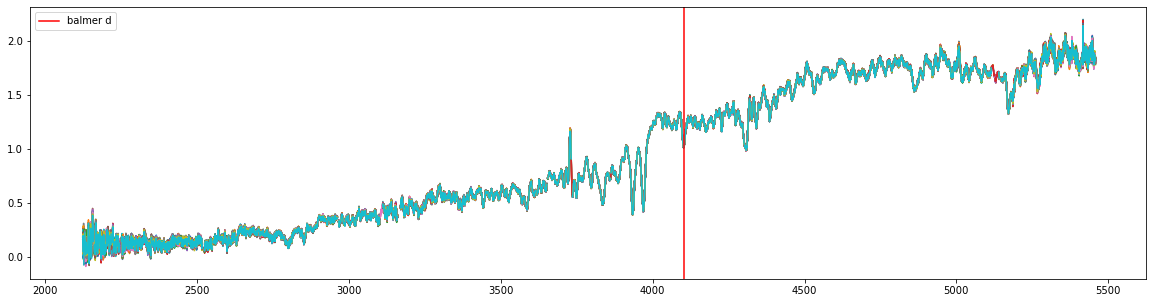

In [85]:
plt.figure(figsize=(20,5))

for i in boot[0]:
    plt.plot(wl,i)
plt.axvline(balmer_d,c = 'r',label='balmer d')
#plt.axvline(balmerb,c = 'yellow',label='balmer b')
#plt.axvline(C1,label='C I')
#@plt.axvline(D1,c = 'c',label='D1')
#plt.axvline(D2,c = 'm',label='D2')
#plt.axvline(O2,c = 'orange',label='O2')
#plt.xlim(balmer_d-23,balmer_d+23)
plt.legend()
plt.show()

No handles with labels found to put in legend.


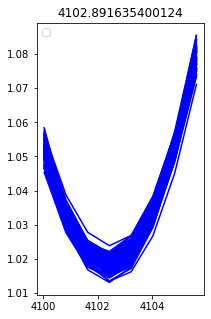

In [112]:
plt.figure(figsize=(3,5))
mask = np.where(np.logical_and(wl>balmer_d-3, wl<=balmer_d+3))
fit_vals = []
for i in boot[0]:
    res = np.polyfit(wl[mask],i[mask],deg=2)
    p = np.poly1d(res)
    fit_vals.append(wl[mask][np.where(p(wl[mask]) == np.min(p(wl[mask])))[0]][0])
    #plt.plot(wl[mask],i[mask],c = 'r',linestyle=':')
    plt.plot(wl[mask],p(wl[mask]),c='b')#,label=str(round(wl[mask][np.where(p(wl[mask]) == np.min(p(wl[mask])))[0]][0],3)))
plt.legend()
plt.title(balmer_d)
plt.show()

In [113]:
fit_vals=np.array(fit_vals)

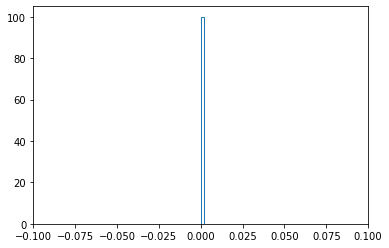

In [114]:
plt.hist(fit_vals-np.mean(fit_vals),histtype='step',bins=500)
plt.xlim(-0.1,0.1)
plt.show()

In [115]:
fit_vals

array([4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736333,
       4102.43736333, 4102.43736333, 4102.43736333, 4102.43736